## Problem 2: Ising model
*30 points*

Start from the `RandomNumbers/ising.ipynb` notebook in the CompPhys repository. The notebook has been copied into this folder; you are free to copy any code from that notebook without worrying about citation. 

### Problem 2a
*10 points*

First, let's explore the effect of various parameters in the simulation. Recall that sudden reversals of the magnetization occur occasionally in systems of finite size. What is a reasonable value of `L` (number of spins per axis) to be chosen to maintain one single domain, versus flipping throughout? What value of `Nskip` (the number of spins flipped between each sample, aka the number of Metropolis-Hastings steps in between recorded samples) do you need to ensure an appropriate MC simulation? Show a plot of the average magnetization per spin at temperature T = 2.0 for various values of `L` and `Nskip`, and describe the result in your writeup.


### Problem 2b
*10 points*

Recall from the lectures that the analytical solution of the 2D Ising model predicts the following behavior of the average magnetization per spin: 

$$m\sim(T_C-T)^{\beta}$$. 

Starting from your simulation after part (a) (i.e. with a reasonable value of `L` and `Nskip`), re-run the simulation as a function of the temperature, $T$, and fit the resulting $\langle m \rangle$ versus $T$ for the the critical temperature, $T_C$, and the exponent, $\beta$. 


### Problem 2c
*10 points*

Similarly to part (b), use your simulation to compute the energy per spin as a function of $T$. Plot the result, and determine the heat capacity, $C=\frac{\partial E}{\partial T}$. 

We have copied some code from ising.ipynb for you already.

### Compile with swig

In [3]:
! swig -c++ -python swig/ising.i
! python swig/setup_ising.py build_ext --inplace

### Import from swig
Remember, if you modify anything in the C++ code, you have to restart the kernel in this notebook to load the changes (just re-importing does not work).

In [4]:
import sys
import os
sys.path.append( os.path.abspath("swig") )
import ising
import numpy as np
import matplotlib.pyplot as plt

### Initialize the system

In [5]:
L = 100 # number of spins per side (square)
J = 1.0 # coupling between spins
Nskip = L**2 # flip Nskip spins per step, should be at least the number of spins
H = 0.0 # external magnetic field
MCSteps = 20000 # Total number of samples to draw


### Run the simulations for various temperatures


Also plot the average magnetization as a function of the MC step. 

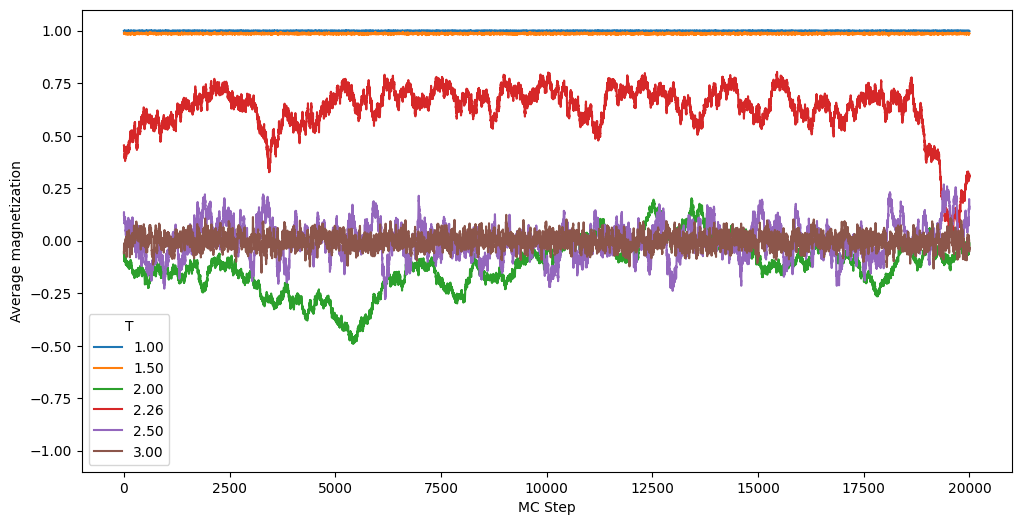

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

E_avg_vals = []
m_avg_vals = []
T_vals = [1.0, 1.5, 2.0, 2.26, 2.5, 3.0]
for T in T_vals:
    i = ising.Ising(J, L, Nskip, T, H)
    i.thermalize(int(MCSteps * 0.2))
    i.run(MCSteps)
    mvals = i.get_m_vals()
    ax.plot(mvals, label=f"{T:3.2f}")
    E_avg_vals.append(i.get_eAvg())
    m_avg_vals.append(i.get_mAvg())

ax.legend(title="T")
#ax.set_xlim(-100, 2000)
ax.set_ylim(-1.1,1.1)
ax.set_xlabel("MC Step")
ax.set_ylabel("Average magnetization")
plt.show()

### Your turn

Do your work starting here.